In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\HP\\OneDrive\\Desktop\\DS course\\Elevate Lab Tasks\\Elevate Labs Task5\\')

Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



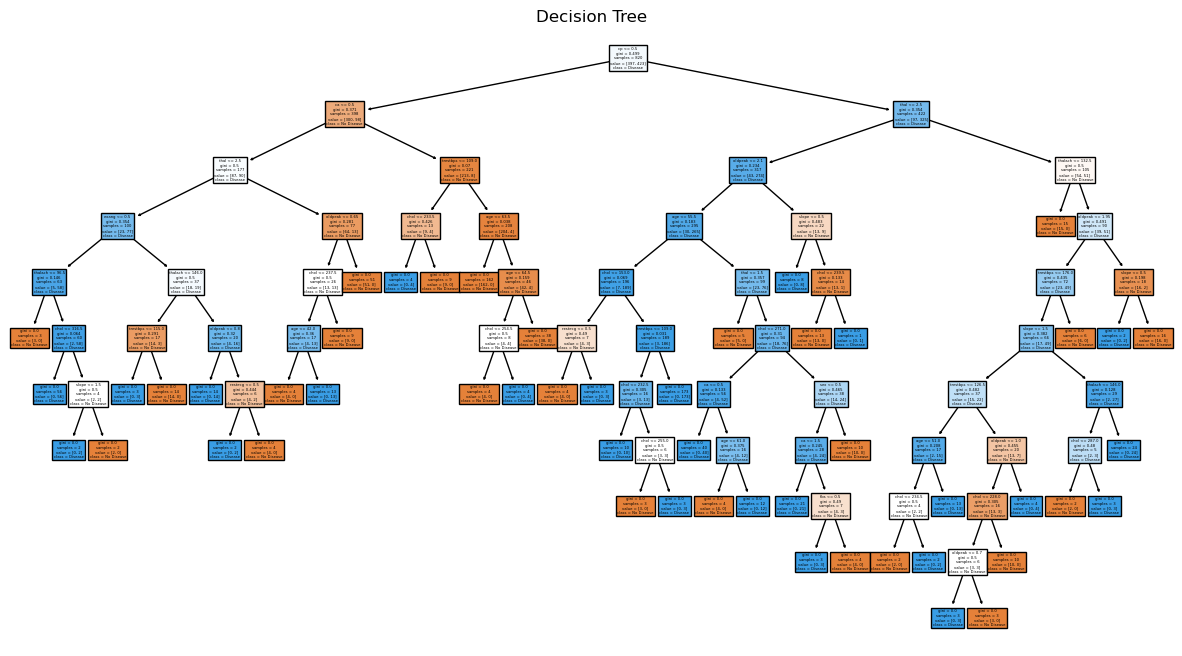

Max Depth 1 → Accuracy: 0.7512
Max Depth 2 → Accuracy: 0.6780
Max Depth 3 → Accuracy: 0.7805
Max Depth 4 → Accuracy: 0.8000
Max Depth 5 → Accuracy: 0.8439
Max Depth 6 → Accuracy: 0.8829
Max Depth 7 → Accuracy: 0.9171
Max Depth 8 → Accuracy: 0.9756
Max Depth 9 → Accuracy: 0.9805
Max Depth 10 → Accuracy: 0.9854


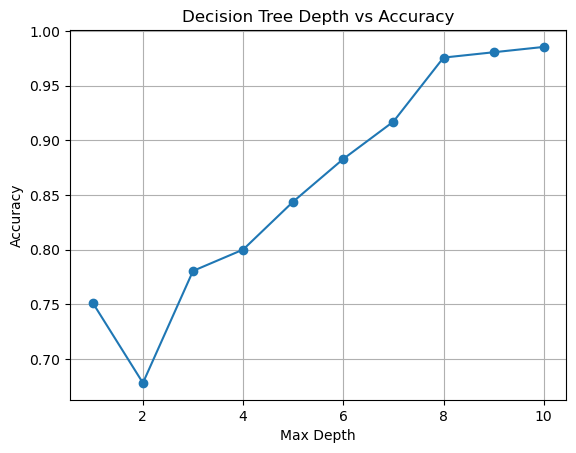

Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



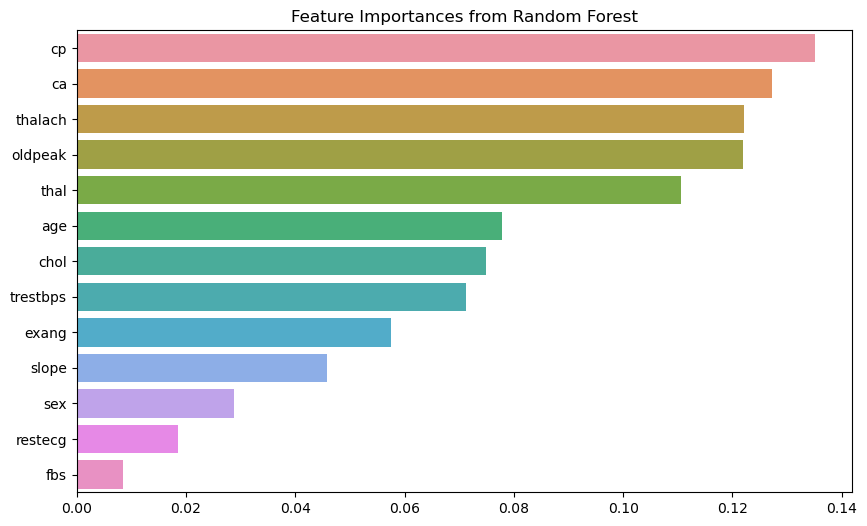

Decision Tree CV Accuracy: 1.0000
Random Forest CV Accuracy: 0.9971


In [4]:

import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("heart.csv")

# Split into features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Visualize the decision tree
plt.figure(figsize=(15, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree")
plt.show()

# 2. Overfitting Analysis - Limit tree depth
accuracies = []
for depth in range(1, 11):
    temp_dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    temp_dt.fit(X_train, y_train)
    acc = accuracy_score(y_test, temp_dt.predict(X_test))
    accuracies.append(acc)
    print(f"Max Depth {depth} → Accuracy: {acc:.4f}")

plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Depth vs Accuracy")
plt.grid()
plt.show()

# 3. Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 4. Feature Importances from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances from Random Forest")
plt.show()

# 5. Cross-Validation Accuracy
cv_dt = cross_val_score(dt, X, y, cv=5).mean()
cv_rf = cross_val_score(rf, X, y, cv=5).mean()

print(f"Decision Tree CV Accuracy: {cv_dt:.4f}")
print(f"Random Forest CV Accuracy: {cv_rf:.4f}")
